In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading movie data
df_movie=pd.read_csv('/content/drive/MyDrive/data/movie_ratings/movies.csv',sep="::")
df_movie.head()

<ipython-input-2-6581cbfc439c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movie=pd.read_csv('/content/drive/MyDrive/data/movie_ratings/movies.csv',sep="::")


,Movieid,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_movie.shape

(3883, 3)

In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Movieid  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [5]:
# Checking for null values
df_movie.isnull().any()

Movieid    False
Title      False
Genres     False
dtype: bool

In [6]:
# Reading ratings data
df_ratings=pd.read_csv('/content/drive/MyDrive/data/movie_ratings/ratings.csv',sep="::")
df_ratings.head()

<ipython-input-6-188a3c65b425>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_ratings=pd.read_csv('/content/drive/MyDrive/data/movie_ratings/ratings.csv',sep="::")


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df_ratings.shape

(1000209, 4)

In [8]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [9]:
# Checking for null values
df_ratings.isnull().any()

UserID       False
MovieID      False
Rating       False
Timestamp    False
dtype: bool

In [10]:
# Dropping unrelated columns
df_ratings=df_ratings.drop('Timestamp',axis=1)

In [11]:
# Reading users data
df_users=pd.read_csv('/content/drive/MyDrive/data/movie_ratings/users.csv',sep="::")
df_users.head()

<ipython-input-11-27e88e17c68f>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_users=pd.read_csv('/content/drive/MyDrive/data/movie_ratings/users.csv',sep="::")


,UserId,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
df_users.shape

(6040, 5)

In [13]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserId      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [14]:
# Checking for null values
df_users.isnull().any()

UserId        False
Gender        False
Age           False
Occupation    False
Zip-code      False
dtype: bool

In [15]:
# Dropping unrelated columns
df_users=df_users.drop(['Zip-code','Occupation'],axis=1)

In [16]:
# Converting into numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_users['Gender']=le.fit_transform(df_users['Gender'])
df_users.head(3)

,UserId,Gender,Age
0,1,0,1
1,2,1,56
2,3,1,25


In [17]:
# Joining three dataframe to make one final dataframe
df=pd.concat([df_movie,df_ratings,df_users],axis=1)
# Dropping null rows
df=df.dropna()
df.head()

,Movieid,Title,Genres,UserID,MovieID,Rating,UserId,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0


In [18]:
# Checking for null values
df.isna().sum()

Movieid    0
Title      0
Genres     0
UserID     0
MovieID    0
Rating     0
UserId     0
Gender     0
Age        0
dtype: int64

In [19]:
df.shape

(3883, 9)

<Axes: ylabel='Frequency'>

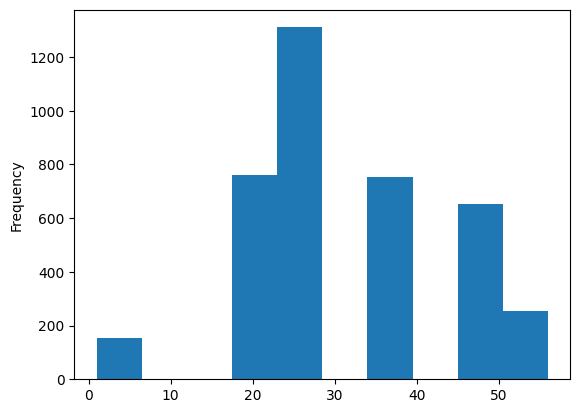

In [20]:
# Graph relation for age
df.Age.plot.hist()

<Axes: ylabel='Frequency'>

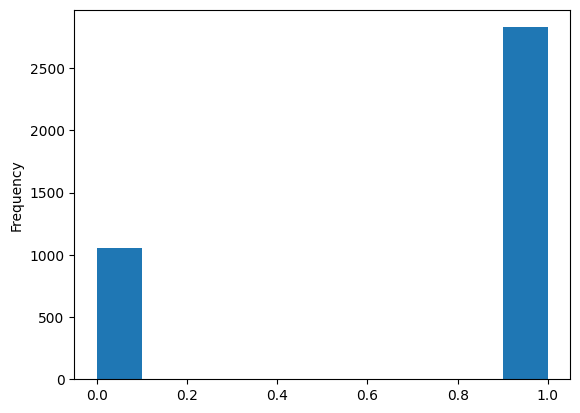

In [21]:
# 0 here denotes female and 1 here denotes male
df.Gender.plot.hist()

<Axes: ylabel='Frequency'>

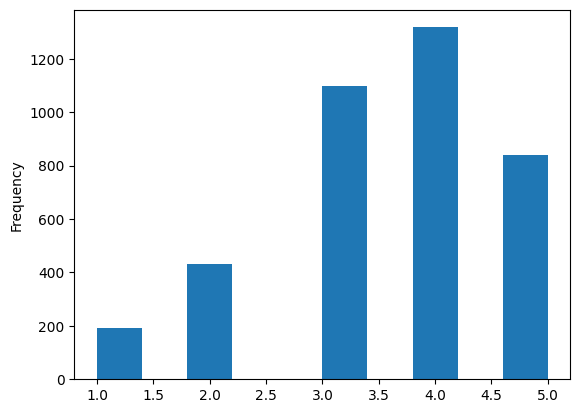

In [22]:
# Ratings graph
df.Rating.plot.hist()

<ipython-input-23-b896e94fe5ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

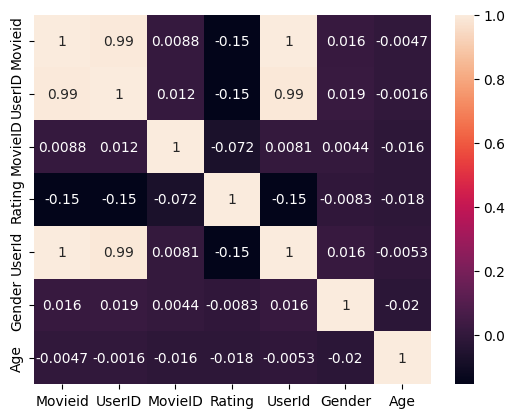

In [23]:
# Correlation between all columns
sns.heatmap(df.corr(),annot=True)

In [24]:
# x input and y target
x=df.drop(['Title','Rating','Genres'],axis=1)
y=df.Rating

In [25]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=150)

In [26]:
# Using Logistic Reression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Checking the model prediction
lr.predict(x_test)

array([4, 3, 4, ..., 4, 4, 4])

In [28]:
# Comparing x_test to y_test
y_test

2357    4
3742    2
864     5
3070    2
2138    2
       ..
3440    5
511     3
56      3
1523    4
3122    5
Name: Rating, Length: 1165, dtype: int64

In [29]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()

In [30]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=200)

In [31]:
# Training the model with support vector classifier
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [32]:
# Comparing y_pred to y_test
y_test

2692    4
2747    4
1837    4
363     4
323     3
       ..
3712    3
3286    2
2862    3
1437    3
3540    3
Name: Rating, Length: 1165, dtype: int64